# Trans Effect Pancan Pearson Correlations 

This notebook graphs pearson correlations between phosphoproteomics averaged across the gene (Ex EGFR) and a specific site. 

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
import scipy.stats
import re
import sys 
import math

import cptac
import cptac.utils as u
import plot_utils as p

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load all cptac cancers
brain = cptac.Gbm()
ccrcc = cptac.Ccrcc()
en = cptac.Endometrial()
hnscc = cptac.Hnscc()
colon = cptac.Colon()
brca = cptac.Brca()
luad = cptac.Luad()
Ovar = cptac.Ovarian()
Lscc = cptac.Lscc()

In [4]:
#cptac version
cptac.version()

'0.9.1'

In [6]:
'''
@Param df1: Dataframe. Contains numeric values (such as proteomics) for pearson correlaton 
@Param x_axis: String. Used as the label for the x-axis as well as the column name for the x-axis values.
@Param y_axis:String. Used as the label for the y-axis as well as the column name for the y-axis values.
This fuction takes a dataframe with numeric values (such as proteomics) and performs a pearson correlation analysis
between two user specified columns within the dataframe. 
The function then prints the uncorrected pvalue and coorelation value.

'''
def pearson_stats(df1, x_axis, y_axis, print_stats = True):
      
    df1_subset = df1[[x_axis,y_axis]]
    df1_subset = df1_subset.dropna(axis=0, how="any")
    count_row = df1_subset.shape[0]
    if count_row > 20:
        x1 = df1_subset[[x_axis]].values
        y1 = df1_subset[[y_axis]].values
        x1 = x1[:,0]
        y1 = y1[:,0]
        corr, pval = scipy.stats.pearsonr(x1,y1)
        if print_stats:
            print("Correlation: " + str(corr))
            print("P_value:" + str(pval))
        
        else:
            return [corr,pval]
        
    else: 
        return "Not Enough Data"
   

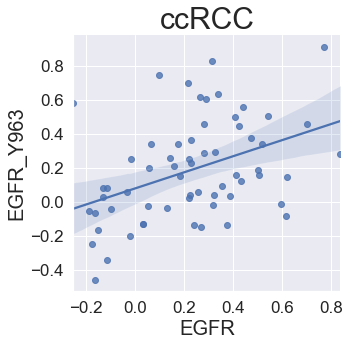

Correlation: 0.41424412235188873
P_value:0.0008165811878911341


In [14]:
phospho_gene = ccrcc.get_phosphoproteomics_gene("tumor") #get phospho for whole gene 
phospho_gene = phospho_gene[["EGFR"]]
#get phospho for site
phospho_site = ccrcc.get_phosphoproteomics("tumor")
if isinstance(phospho_site.keys(), pd.core.indexes.multi.MultiIndex):
        phospho_site = u.reduce_multiindex(phospho_site, levels_to_drop = 2)
        phospho_site = u.reduce_multiindex(phospho_site, levels_to_drop = 2)
phospho_site.columns =phospho_site.columns.map('_'.join)
phospho_site = phospho_site[phospho_site.columns[pd.Series(phospho_site.columns).str.startswith("EGFR")]]
phospho_gene_site = phospho_gene.merge(phospho_site, on = "Patient_ID")
       
p.plot_pearson(phospho_gene_site,"EGFR","EGFR_Y963" , "none", title = "ccRCC", ra_stats = False, show_plot = True,save_file_name= "png_files/Hnscc_PPP2R3A")
pearson_stats(phospho_gene_site,"EGFR","EGFR_Y963")


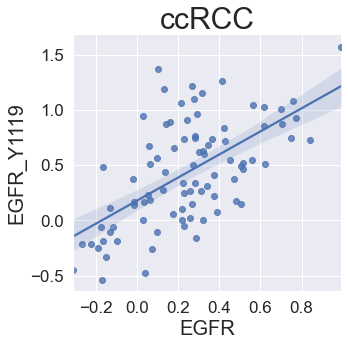

Correlation: 0.6061692846888262
P_value:3.890887142473612e-10


In [15]:
phospho_gene = ccrcc.get_phosphoproteomics_gene("tumor") #get phospho for whole gene 
phospho_gene = phospho_gene[["EGFR"]]
#get phospho for site
phospho_site = ccrcc.get_phosphoproteomics("tumor")
if isinstance(phospho_site.keys(), pd.core.indexes.multi.MultiIndex):
        phospho_site = u.reduce_multiindex(phospho_site, levels_to_drop = 2)
        phospho_site = u.reduce_multiindex(phospho_site, levels_to_drop = 2)
phospho_site.columns =phospho_site.columns.map('_'.join)
phospho_site = phospho_site[phospho_site.columns[pd.Series(phospho_site.columns).str.startswith("EGFR")]]
phospho_gene_site = phospho_gene.merge(phospho_site, on = "Patient_ID")
       
p.plot_pearson(phospho_gene_site,"EGFR","EGFR_Y1119" , "none", title = "ccRCC", ra_stats = False, show_plot = True,save_file_name= "png_files/Hnscc_PPP2R3A")
pearson_stats(phospho_gene_site,"EGFR","EGFR_Y1119")


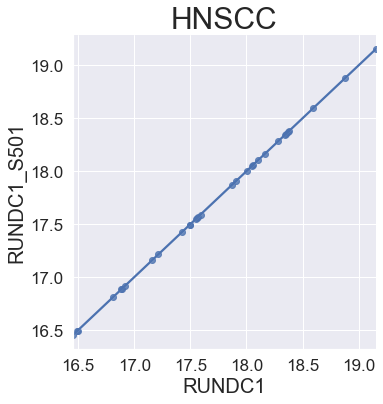

Correlation: 0.9999999999999999
P_value:1.5501765212776126e-228


,RUNDC1_S499,RUNDC1_S501,RUNDC1_S71,RUNDC1_T321,RUNDC1
Patient_ID,,,,,
C3N-03878,NaN,NaN,15.286660,13.678558,14.482609
C3N-03888,NaN,NaN,16.712975,NaN,16.712975
C3N-03889,NaN,NaN,NaN,NaN,NaN
C3N-03928,NaN,NaN,16.189295,NaN,16.189295
C3N-03933,NaN,17.907023,NaN,NaN,17.907023
C3N-04152,NaN,NaN,NaN,NaN,NaN
C3N-04273,NaN,18.006654,NaN,NaN,18.006654
C3N-04275,NaN,NaN,NaN,NaN,NaN
C3N-04276,NaN,NaN,17.091135,NaN,17.091135


In [16]:
site = "RUNDC1_S501"
gene = "RUNDC1"
phospho_site = hnscc.get_phosphoproteomics("tumor")
if isinstance(phospho_site.keys(), pd.core.indexes.multi.MultiIndex):
    phospho_site = u.reduce_multiindex(phospho_site, levels_to_drop = 2)
    phospho_site = u.reduce_multiindex(phospho_site, levels_to_drop = 2)
    phospho_site = phospho_site.dropna(thresh=20, axis=1)
phospho_site.columns =phospho_site.columns.map('_'.join)
phospho_site = phospho_site[phospho_site.columns[pd.Series(phospho_site.columns).str.startswith(gene)]]
    
phospho_site[gene] = phospho_site.mean(numeric_only=True, axis=1)
p.plot_pearson(phospho_site,gene,site , "none", title = "HNSCC", ra_stats = False, show_plot = True)
pearson_stats(phospho_site,gene,site)
phospho_site.tail(20)

Note that if the amount phospho data is sparse, then it will appear that there is a strong correlation when really there is no averaging of phospho sites. 

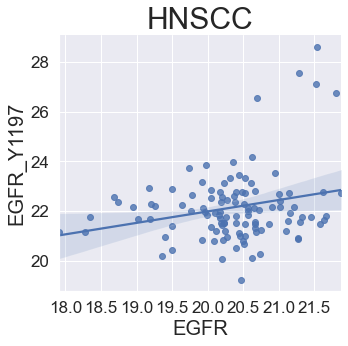

Correlation: 0.24111414277283819
P_value:0.011164969243249018


In [17]:
gene = "EGFR"
phospho_site = hnscc.get_phosphoproteomics("tumor")
if isinstance(phospho_site.keys(), pd.core.indexes.multi.MultiIndex):
    phospho_site = u.reduce_multiindex(phospho_site, levels_to_drop = 2)
    phospho_site = u.reduce_multiindex(phospho_site, levels_to_drop = 2)
phospho_site.columns =phospho_site.columns.map('_'.join)
phospho_site = phospho_site[phospho_site.columns[pd.Series(phospho_site.columns).str.startswith(gene)]]
    
phospho_site["EGFR"] = phospho_site.mean(numeric_only=True, axis=1)
p.plot_pearson(phospho_site,"EGFR","EGFR_Y1197" , "none", title = "HNSCC", ra_stats = False, show_plot = True,save_file_name= "png_files/Hnscc_PPP2R3A")
pearson_stats(phospho_site,"EGFR","EGFR_Y1197")
